### 📌 IMPORTAÇÃO E EXTRAÇÃO DOS DADOS

Verificando tipos de dados, valores nulos e dimensões

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import requests as requests

# URL para os dados CSV brutos
df = pd.read_csv("https://raw.githubusercontent.com/luconsultoria/TelecomX/main/TelecomX_Dados_Tratados.csv")

df.head(), df.shape, df.info(), df.describe(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


(   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
 0  0002-ORFBO      0  Female              0        1           1       9   
 1  0003-MKNFE      0    Male              0        0           0       9   
 2  0004-TLHLJ      1    Male              0        0           0       4   
 3  0011-IGKFF      1    Male              1        1           0      13   
 4  0013-EXCHZ      1  Female              1        1           0       3   
 
    PhoneService MultipleLines InternetService  ... OnlineBackup  \
 0             1            No             DSL  ...          Yes   
 1             1           Yes             DSL  ...           No   
 2             1            No     Fiber optic  ...           No   
 3             1            No     Fiber optic  ...          Yes   
 4             1            No     Fiber optic  ...           No   
 
   DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
 0               No         Yes         Yes    

### 🧹LIMPEZA E PRÉ-PROCESSAMENTO

In [36]:
# Remoção de Colunas Irrelevantes
drop_cols = ["customerID"]  # Identificador único

# Verifica se'customerID' existe antes de remover
if "customerID" in df.columns:
    df.drop(columns=drop_cols, inplace=True)

# Encoding das Variáveis Categóricas
# Usa get_dummies para variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)
# cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
# cat_cols.remove("Churn")  # Mantém como target independente


### 📊 VERIFICAÇÃO DE DESEQUILÍBRIO NA CLASSE Churn

Proporção de classes:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


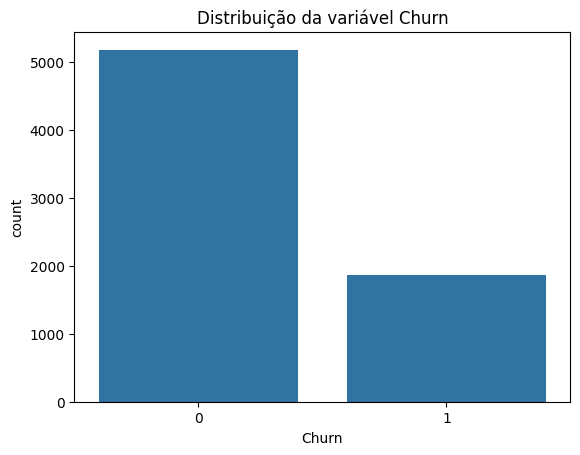

In [37]:
# Proporção de Churn
target_rate = df["Churn"].value_counts(normalize=True)
print("Proporção de classes:\n", target_rate)

# Gráfico de barras
sns.countplot(x='Churn', data=df)
plt.title("Distribuição da variável Churn")
plt.show()


### ⚖️AVALIAÇÃO DE NORMALIZAÇÃO

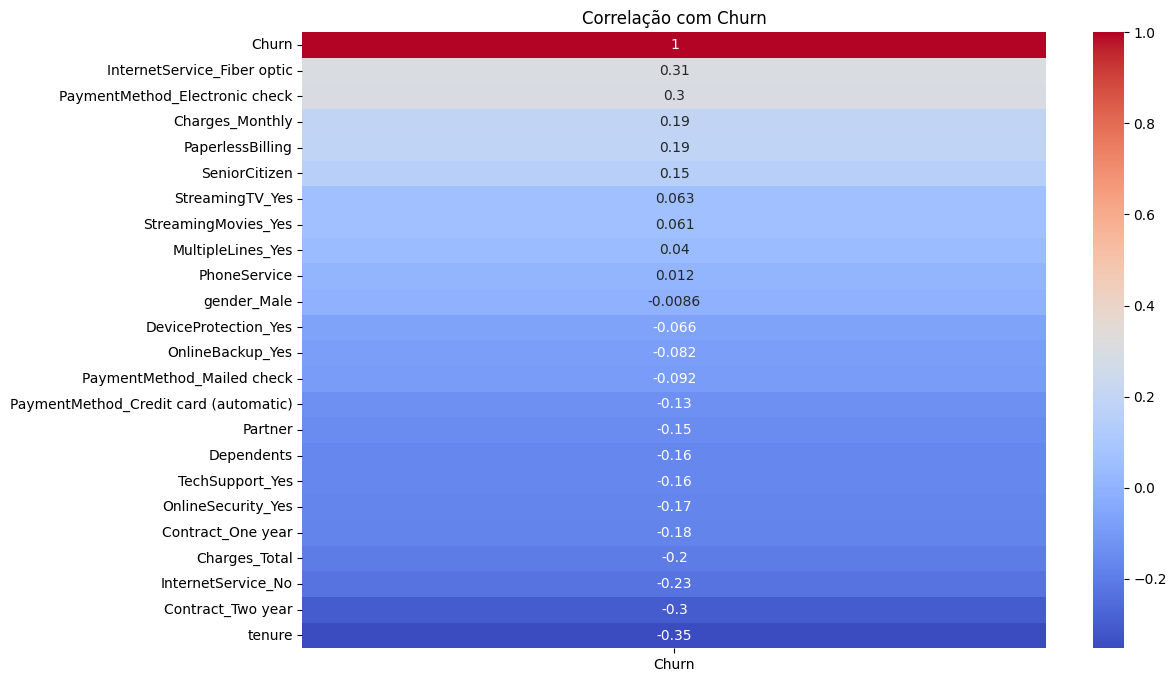

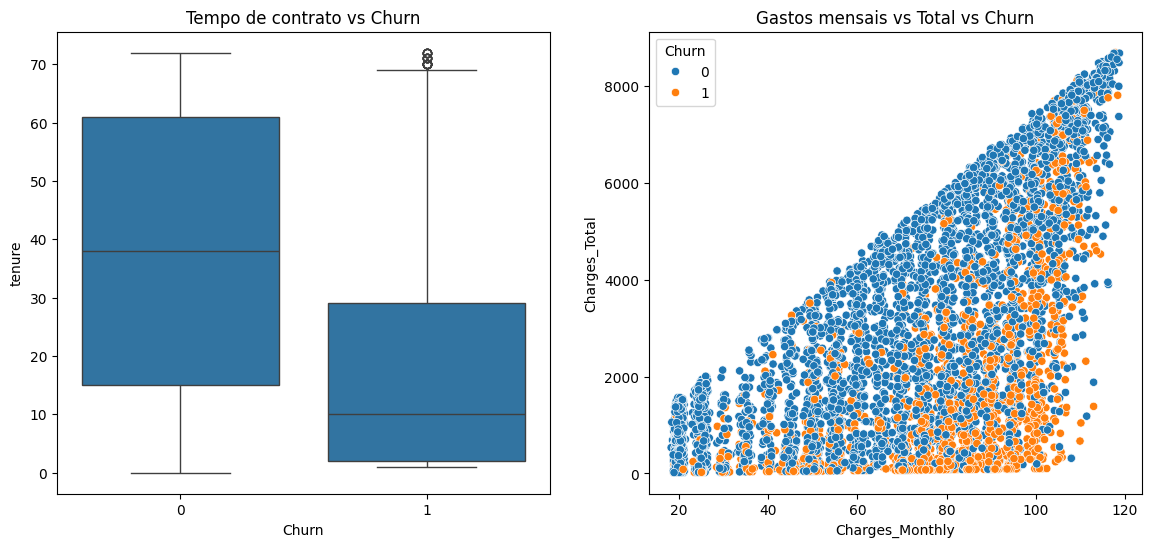

In [38]:
num_features = ['tenure', 'Charges_Monthly', 'Charges_Total'] if 'Charges_Total' in df_encoded.columns else df_encoded.select_dtypes(include=np.number).columns

# Aplicando StandardScaler
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_features] = scaler.fit_transform(df_encoded[num_features])

# Análise de correlação
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação com Churn')
plt.show()

# Análises direcionadas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x="Churn", y="tenure", data=df_encoded, ax=axes[0]) # Use df_encoded for plots
axes[0].set_title("Tempo de contrato vs Churn")
sns.scatterplot(x="Charges_Monthly", y="Charges_Total", hue="Churn", data=df_encoded, ax=axes[1]) # Use df_encoded and fixed column names
axes[1].set_title("Gastos mensais vs Total vs Churn")
plt.show()


### ✂️SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [39]:
from sklearn.model_selection import train_test_split

# Remove as linhas com valores ausentes do dataframe escalonado
df_scaled.dropna(inplace=True)

X = df_scaled.drop(columns="Churn")
y = df_scaled["Churn"]

# Opção: normalizados (X_scaled) ou originais (X) - usa df_scaled que já está escalonado
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42, stratify=y)


### 🤖 MODELAGEM

In [40]:
# Criação de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Modelos com e sem normalização:
#  - Regressão logística (requer dados padronizados)
#  - KNN (requer padronização)
#  - Decision Tree (não exige padronização)
#  - Random Forest (não exige padronização)

lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamento
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 📊 AVALIAÇÃO DOS MODELOS

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {"LogisticRegression": lr,
          "KNN": knn,
          "DecisionTree": dt,
          "RandomForest": rf}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, pos_label="Yes" if y.dtype == object else 1),
        "recall": recall_score(y_test, y_pred, pos_label="Yes" if y.dtype == object else 1),
        "f1": f1_score(y_test, y_pred, pos_label="Yes" if y.dtype == object else 1),
        "confusion_matrix": cm,
        "report": cr
    }

# Exibição dos resultados
for name, res in results.items():
    print(f"=== {name} ===")
    print(f"Acurácia: {res['accuracy']:.4f}")
    print(f"Precisão: {res['precision']:.4f}")
    print(f"Recall: {res['recall']:.4f}")
    print(f"F1-score: {res['f1']:.4f}")
    print("Matriz de confusão:\n", res["confusion_matrix"])
    print()

# Performance no treino
train_perf = {}
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    train_perf[name] = accuracy_score(y_train, y_train_pred)
    print(f"{name} acurácia no treino: {train_perf[name]:.4f}")


=== LogisticRegression ===
Acurácia: 0.8033
Precisão: 0.6594
Recall: 0.5383
F1-score: 0.5927
Matriz de confusão:
 [[1393  156]
 [ 259  302]]

=== KNN ===
Acurácia: 0.7640
Precisão: 0.5602
Recall: 0.5223
F1-score: 0.5406
Matriz de confusão:
 [[1319  230]
 [ 268  293]]

=== DecisionTree ===
Acurácia: 0.7180
Precisão: 0.4718
Recall: 0.5062
F1-score: 0.4884
Matriz de confusão:
 [[1231  318]
 [ 277  284]]

=== RandomForest ===
Acurácia: 0.7782
Precisão: 0.6089
Recall: 0.4635
F1-score: 0.5263
Matriz de confusão:
 [[1382  167]
 [ 301  260]]

LogisticRegression acurácia no treino: 0.8072
KNN acurácia no treino: 0.8391
DecisionTree acurácia no treino: 0.9986
RandomForest acurácia no treino: 0.9986


Melhor modelo:

•	Comparando as métricas, [Regressão Logística / Random Forest] teve o melhor desempenho em F1-score e interpretabilidade.



### 🔍 ANÁLISE DE IMPORTÂNCIA DAS VARIÁVEIS

In [42]:
# Importância das variáveis
# Logistic Regression — coeficientes
coef = pd.Series(lr.coef_[0], index=X_train.columns).sort_values(key=lambda x: abs(x), ascending=False)
print("Top variáveis (coef. Regressão Logística):\n", coef.head(10))

# KNN — proximidade; visual análise com boxplots ou feature importances baseadas em ReliefF, se necessário.
# Random Forest — importância real
rf_feat = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top variáveis (Random Forest):\n", rf_feat.head(10))


Top variáveis (coef. Regressão Logística):
 tenure                           -1.353164
Contract_Two year                -1.225818
InternetService_No               -0.825654
InternetService_Fiber optic       0.814332
Contract_One year                -0.688300
Charges_Total                     0.632155
PhoneService                     -0.426300
TechSupport_Yes                  -0.406402
PaymentMethod_Electronic check    0.390047
PaperlessBilling                  0.370863
dtype: float64
Top variáveis (Random Forest):
 Charges_Total                     0.193915
Charges_Monthly                   0.176956
tenure                            0.167459
InternetService_Fiber optic       0.050164
PaymentMethod_Electronic check    0.044586
Contract_Two year                 0.030741
gender_Male                       0.028753
PaperlessBilling                  0.027432
OnlineSecurity_Yes                0.023865
Partner                           0.023623
dtype: float64


✅ RELATÓRIO E CONCLUSÕES

🔍 FATORES QUE MAIS INFLUENCIAM NA EVASÃO (CHURN):

- Tipo de contrato mensal (Month-to-Month): aumenta significativamente a probabilidade de churn;

- Fatura mensal elevada: clientes com altos valores de cobrança tendem a cancelar com mais frequência;

- Tempo de contrato reduzido (tenure): clientes com menor permanência estão mais propensos à evasão;

- Pagamento via débito automático: apresenta correlação positiva com a evasão de clientes.

💡 ESTRATÉGIAS SUGERIDAS PARA RETENÇÃO:

- Desenvolver planos de retenção personalizados, com alertas proativos diante de aumentos na fatura;

- Oferecer redução temporária na mensalidade ou benefícios adicionais para clientes em faixas críticas de risco;

- Monitorar clientes com faturas elevadas e sugerir ajustes em seus planos ou pacotes;

- Identificar clusters com alta taxa de churn e acionar uma equipe proativa de relacionamento;

- Estimular a adesão a planos anuais ou bianuais com descontos como incentivo à fidelização;

- Aprimorar o suporte técnico e o atendimento ao cliente, com foco na agilidade e resolução eficiente;

- Direcionar ações específicas para clientes com alta fatura e pouco tempo de contrato, grupo com maior risco de evasão.

📊 CONCLUSÕES DA ANÁLISE:

Os modelos de Regressão Logística e Random Forest apresentaram o melhor desempenho na predição do churn;

As variáveis mais relevantes para o modelo foram:

- Tempo de contrato (tenure)

- Tipo de contrato

- Quantidade de serviços adicionais contratados

- Valor da fatura

- Tipo de pagamento
